In [27]:
# import the modules
import pandas as pd
import numpy as np
from numpy import array
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer



### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [28]:
# to treat missing values

def treat_null_values(df, method):
    """Treats the missing values in the dataframe.
    
    This function accepts a dataframe and the method to treat the missing value.
    Depending on the method passed, impute/drop the missing values.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to treat the missing values
    method -- method to treat the missing values
    """
    if method == 'drop':
        df.dropna(inplace = True)
    elif method == 'mean':
        df.fillna(round(df.mean(),1), inplace = True)
    elif method == 'median':
        df.fillna(df.median(), inplace = True)
    elif method == 'mode':
        df.fillna(df.mode()[0], inplace = True)
    else:
        df.fillna('NA', inplace = True)
    

In [29]:

# to seperate the numerical and categorical columns

def num_and_cat_columns(df):
    """Return seperate list of numerical & categorical columns.
    
    This function accepts a dataframe and returns two lists,
    one containing the names of numerical columns(num_cols) and the other categorical columns(cat_cols).
        
    Keyword arguments:
    df -- pandas dataframe for which we want the list of columns
    
    Returns:
    num_cols -- list of numerical columns
    cat_cols -- list of categorical columns
    """
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_cols = list(set(cols) - set(num_cols))
    
    return num_cols, cat_cols
    
    

In [30]:
# to encode the categorical column so as to convert them to numeric.
    
def encode_category(df, enc, col, method):
    """Encodes the categorical columns of the dataframe.
    
    This function accepts a dataframe and columns to be encoded along with the method to be used for encoding.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns -- this dataframe would be transformed
    enc -- the encoder - fitted on the train data
    col -- list of columns that is to be encoded
    method -- method to be used while encoding
    
    Returns:
    df1 -- the encoded dataframe
    """
    if method == 'label':
        # lb = LabelEncoder()
        # lb.fit(df[col])
        df[col] = enc.transform(df[col].astype(str))
    
    elif method == 'onehot':
        # ohe = OneHotEncoder(handle_unknown='ignore')
        # ohe.fit(df[[col]])
        tempdf = enc.transform(df[[col]]).toarray()
        newdf = pd.DataFrame(tempdf, columns = np.array(ohe.categories_).ravel())
        df = pd.concat([df, newdf], axis=1)
        df.drop(columns=[col], inplace = True)
        
    return df
    

In [31]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    #df[col] = df[col].apply(lambda s: s.strip('$')).astype(float)
    df[col] = df[col].str.replace('$', '').astype(float)
    return df
    

In [32]:
# to visualize distributions of the column(s) by plotting them.
    
def plot_distribution(kind_, df, *col):
    """Plot distribution of the column(s).
    
    This function will plot a chart of the passed column as the 'kind' specified in kind_.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    knid_ -- 'kind' of chart that will be plotted
    df -- pandas dataframe which has the data
    *col -- list of all the features for which we want to plot the distribution
    """
    if kind_ == 'box':
        
        if len(col) == 1:
            boxplot = df.boxplot(column = col[0], rot = 90)
            plt.show()
        
        elif len(col) > 1:
            for c in col[1:]:
                boxplot = df.boxplot(column = col[0], by = c, rot = 90)
            plt.show()
        
    else:
        if len(col) == 0:
            df.plot(kind = kind_)
            plt.show()
        
        elif len(col) == 1:
            df[col[0]].plot(kind = kind_)
            plt.xlabel(col[0])
            plt.show()
        
        elif len(col) == 2:
            df.plot(x = col[0], y = col[1], kind = kind_)
            plt.xlabel(col[0])
            plt.ylabel(col[1])
            plt.show()
        
        else:
            print("Unable to plot a chart with given parameters.")
    

In [33]:
# to apply transformation to any column

def transform_column(df, col, transformation):
    """Apply transformation to the column(s).
    
    This function will apply the passed transformation to the given dataframe & columns.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to apply the transformation
    transformation -- the transformation we want to apply
    """
    if transformation == 'log':
        df = np.log(df)
        
    elif transformation == 'square':
        df = np.square(df)
        
    elif transformation == 'sqrt':
        df = np.sqrt(df)
    
    

In [34]:
# to check outliers using box plot

def check_outliers(df, col, cat):
    """Check outliers through boxplot.
    
    This function plots and displays the boxplot of the feature col vs all the categories defined. 
    Check for any outlier present.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- the feature for which we want to plot the boxplot
    cat -- the list of features (categorical) by which we want to check the outliers (for each category in each feature)
    """
    if len(cat) == 0:
        boxplot = df.boxplot(column=[col], rot = 90)
    else:
        for c in cat:
            boxplot = df.boxplot(column=[col], by=[c], rot = 90)
    

In [35]:
# to fit the model & return the score

def fit_model(X_train, X_test, y_train, y_test, model):
    """Fit the model & return the score of the fitted model.
    
    This function accepts the test & train data and fits the given model to it and returns the score of the model.
    
    Keyword arguments:
    X_train -- Train feature
    X_test -- Test/Validation feature
    y_train -- Train target
    y_test -- Tets/Validation target
    model -- the model to be fitted
    
    Returns:
    r2 -- R-Square of the fitted model    
    """
         
    if model == 'LinearRegression':
        
        regressor=LinearRegression()
        regressor.fit(X_train,y_train)
        y_pred =regressor.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        
    elif model == 'Lasso':
        
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        lasso_pred = lasso.predict(X_test)
        r2 = r2_score(y_test, lasso_pred)

    elif model == 'Ridge':
        
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        ridge_pred = ridge.predict(X_test)
        r2 = r2_score(y_test, ridge_pred)
        
    
    else:
        model = make_pipeline(PolynomialFeatures(2), LinearRegression())
        model.fit(X_train, y_train)
        model_pred = model.predict(X_test)
        r2= r2_score(y_test,model_pred)


    return r2    
    

### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [52]:
# Code starts here
train = pd.read_csv("train.csv")


#Split the data into X and Y
X = train.drop(columns = ['Total Compensation'])
y = train[['Total Compensation']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   567103 non-null  int64 
 1   Year Type            567103 non-null  object
 2   Year                 567103 non-null  int64 
 3   Organization Group   567103 non-null  object
 4   Department           272038 non-null  object
 5   Union                566758 non-null  object
 6   Job Family           567103 non-null  object
 7   Job                  567100 non-null  object
 8   Employee Identifier  567103 non-null  int64 
 9   Retirement           567103 non-null  object
 10  Health and Dental    567103 non-null  object
 11  Other Benefits       567103 non-null  object
dtypes: int64(3), object(9)
memory usage: 51.9+ MB


Index(['Id', 'Year', 'Employee Identifier'], dtype='object') 3
['Job Family', 'Retirement', 'Health and Dental', 'Job', 'Department', 'Organization Group', 'Year Type', 'Other Benefits', 'Union'] 9
Id                          0
Year Type                   0
Year                        0
Organization Group          0
Department             295065
Union                     345
Job Family                  0
Job                         3
Employee Identifier         0
Retirement                  0
Health and Dental           0
Other Benefits              0
dtype: int64


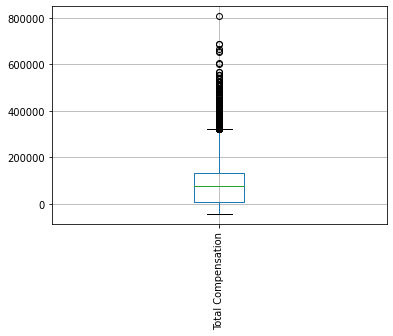

In [53]:
a, b = num_and_cat_columns(X)
print(a,len(a))
print(b, len(b))



print(X.isnull().sum())
check_outliers(y, 'Total Compensation', [])


X.drop(columns = ['Department'], inplace = True)


# Code ends here

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [54]:
# Code starts here

# Have a look at the features, check the type where any currency is involved. 
# We have columns with compensations stored in form of strings. We need to clean it and convert this to numeric. 
# Call the clean_dollar() to do the same. 
#for col in ['Retirement', 'Health and Dental', 'Other Benefits']:
    #X = clean_dollar(X, col)
    
    #X_test = clean_dollar(X_test, c)

for col in ['Retirement', 'Health and Dental', 'Other Benefits']:
    X = clean_dollar(X, col)
X.head()

,Id,Year Type,Year,Organization Group,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits
0,0,Calendar,2018,Community Health,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Principal,8594384,0.00,13527.66,0.00
1,1,Calendar,2014,"Public Works, Transportation & Commerce","SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,0.00,3995.56,875.27
2,2,Fiscal,2018,General City Responsibilities,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",Senior Account Clerk,8512172,0.00,0.00,0.00
3,3,Fiscal,2015,Community Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,Sr Materials & Supplies Sprv,47593,11671.59,10680.55,4400.24
4,4,Fiscal,2014,Community Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Technician,47549,14617.66,12464.61,5562.09


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   567103 non-null  int64  
 1   Year Type            567103 non-null  object 
 2   Year                 567103 non-null  int64  
 3   Organization Group   567103 non-null  object 
 4   Union                566758 non-null  object 
 5   Job Family           567103 non-null  object 
 6   Job                  567100 non-null  object 
 7   Employee Identifier  567103 non-null  int64  
 8   Retirement           567103 non-null  float64
 9   Health and Dental    567103 non-null  float64
 10  Other Benefits       567103 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 47.6+ MB


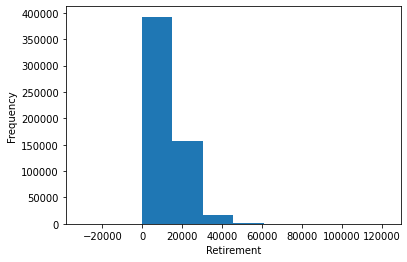

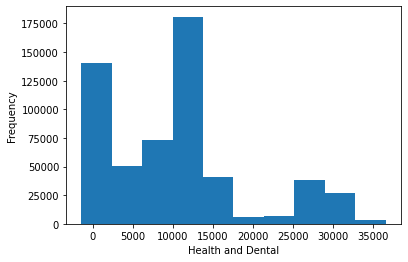

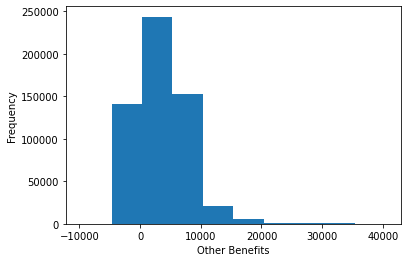

In [56]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
# Apply some good transformation if required. Call transform_column() to do the same.
plot_distribution('hist', X, 'Retirement')
plot_distribution('hist', X, 'Health and Dental')
plot_distribution('hist', X, 'Other Benefits')


In [57]:
# Treat the null values by calling the treat_null_values()

treat_null_values(X['Union'], 'mode')
treat_null_values(X['Job'], 'mode')

In [58]:
# Before we proceed with the model fitting, we need to get rid of the categorical columns.
# We can use One Hot Encoding or Label Encoding to convert the categorical columns to numeric.
#Call the encode_category() with the list of columns and the method of encoding to do the same.
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)
X_train_ = X_train.copy()  # Create a copy of the train data to train the encoder


for col in ['Union', 'Job Family', 'Job', 'Year Type', 'Organization Group']:
    lb = LabelEncoder()
    lb.fit(X_train_[col]) 
    X_test = encode_category(X_test, lb, col, 'label')
    X_train = encode_category(X_train, lb, col, 'label')


In [59]:
# Now since we have encoded all the categorical columns, there shouldn't be any left in the data.
# Check the same by calling num_and_cat_columns()

a, b = num_and_cat_columns(X_train)
print("Numerical Columns:", a,len(a))
print("Categorical Columns:", b, len(b))


Numerical Columns: Index(['Id', 'Year Type', 'Year', 'Organization Group', 'Union', 'Job Family',
       'Job', 'Employee Identifier', 'Retirement', 'Health and Dental',
       'Other Benefits'],
      dtype='object') 11
Categorical Columns: [] 0


### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. Call the `fit_model()` with respective parameters.



In [60]:
# Code Starts here
r2 = fit_model(X_train, X_test, y_train, y_test, 'LinearRegression')
print ("Linear Regression: ", r2)


# # Check if the accuracy increases after using the Lasso Regularization technique.
# # Call the fit_model() with respective parameters.
r2 = fit_model(X_train, X_test, y_train, y_test, 'Lasso')
print ("Lasso: ", r2)


# # Check if the accuracy increases after using the Ridge Regularization technique.
# # Call the fit_model() with respective parameters.

r2 = fit_model(X_train, X_test, y_train, y_test, 'Ridge')
print ("Ridge: ", r2)



# Check if the accuracy increases after using the Polypipeline technique.
r2 = fit_model(X_train, X_test, y_train, y_test, 'Pipeline')
print ("Pipeline: ", r2)

# Which technique was the best? That is your final model.


# Code ends here

Linear Regression:  0.9419217309382262
Lasso:  0.9419216828390474
Ridge:  0.9419217307441705
Pipeline:  0.9589114779285615


In [61]:
# Code Starts here
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']
test

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits
0,0,Calendar,2017,"Public Works, Transportation & Commerce",NaN,"Electrical Workers, Local 6",Journeyman Trade,Electrical Line Worker,8549078,$0.0,$13051.16,$0.0
1,1,Calendar,2019,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall PERS",8546443,$21487.97,$28361.72,$753.13
2,2,Fiscal,2018,Community Health,NaN,"SEIU, Local 1021, Misc",Dietary & Food,Food Service Worker,8512207,$12468.31,$13863.98,$4464.84
3,3,Fiscal,2018,Public Protection,NaN,"SEIU, Local 1021, Misc",Correction & Detention,"Counselor, Juvenile Hall SFERS",8542154,$0.0,$0.0,$1787.63
4,4,Fiscal,2017,Public Protection,POL Police,"SEIU - Miscellaneous, Local 1021",Protection & Apprehension,Police Cadet,48828,$4489.2,$8003.53,$2015.35
...,...,...,...,...,...,...,...,...,...,...,...,...
177215,177215,Calendar,2015,"Public Works, Transportation & Commerce",DPW GSA - Public Works,"Stationary Engineers, Local 39",Supervisory-Labor & Trade,Maintenance Planner,24015,$14998.9,$8213.31,$6267.86
177216,177216,Fiscal,2014,"Public Works, Transportation & Commerce",DPW GSA - Public Works,"Prof & Tech Engineers - Miscellaneous, Local 21",Professional Engineering,Junior Engineer,23113,$5936.78,$4554.36,$2216.86
177217,177217,Fiscal,2020,"Public Works, Transportation & Commerce",NaN,"SEIU, Local 1021, Misc",Housekeeping & Laundry,Custodian,8579314,$6255.97,$6747.52,$2175.79
177218,177218,Fiscal,2015,Human Welfare & Neighborhood Development,HSA Human Services Agency,"SEIU - Miscellaneous, Local 1021","Clerical, Secretarial & Steno",Clerk,6614,$12062.31,$12500.56,$3900.18


In [62]:
# Dropping the same columns from the test data and applying same transformation
test.drop(columns = ['Department'], inplace = True)
treat_null_values(test['Union'], 'mode')
treat_null_values(test['Job'], 'mode')

In [63]:
for c in ['Retirement', 'Health and Dental', 'Other Benefits']:
    test = clean_dollar(test, c)
    
for col in ['Union', 'Job Family', 'Job', 'Year Type', 'Organization Group']:
    lb = LabelEncoder()
    lb.fit(X_train_[col])
    test = encode_category(test, lb, col, 'label')
    
   
# Applying pipeline on test data
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)


# Predict on the test data
y_pred_test = model.predict(test)
y_pred_test = y_pred_test.flatten()

In [64]:
y_pred_test

array([  8974.81589764, 124204.95580122,  88969.87184761, ...,
        47216.09181235,  86553.51165694, 113663.52140698])

In [67]:
# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Total Compensation':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)


# Code ends here